# **Extracting Information from Legal Documents Using RAG**

## **Objective**

The main objective of this assignment is to process and analyse a collection text files containing legal agreements (e.g., NDAs) to prepare them for implementing a **Retrieval-Augmented Generation (RAG)** system. This involves:

* Understand the Cleaned Data : Gain a comprehensive understanding of the structure, content, and context of the cleaned dataset.
* Perform Exploratory Analysis : Conduct bivariate and multivariate analyses to uncover relationships and trends within the cleaned data.
* Create Visualisations : Develop meaningful visualisations to support the analysis and make findings interpretable.
* Derive Insights and Conclusions : Extract valuable insights from the cleaned data and provide clear, actionable conclusions.
* Document the Process : Provide a detailed description of the data, its attributes, and the steps taken during the analysis for reproducibility and clarity.

The ultimate goal is to transform the raw text data into a clean, structured, and analysable format that can be effectively used to build and train a RAG system for tasks like information retrieval, question-answering, and knowledge extraction related to legal agreements.

### **Business Value**  


The project aims to leverage RAG to enhance legal document processing for businesses, law firms, and regulatory bodies. The key business objectives include:

* Faster Legal Research: <br> Reduce the time lawyers and compliance officers spend searching for relevant case laws, precedents, statutes, or contract clauses.
* Improved Contract Analysis: <br> Automatically extract key terms, obligations, and risks from lengthy contracts.
* Regulatory Compliance Monitoring: <br> Help businesses stay updated with legal and regulatory changes by retrieving relevant legal updates.
* Enhanced Decision-Making: <br> Provide accurate and context-aware legal insights to assist in risk assessment and legal strategy.


**Use Cases**
* Legal Chatbots
* Contract Review Automation
* Tracking Regulatory Changes and Compliance Monitoring
* Case Law Analysis of past judgments
* Due Diligence & Risk Assessment

## **1. Data Loading, Preparation and Analysis** <font color=red> [20 marks] </font><br>

### **1.1 Data Understanding**

The dataset contains legal documents and contracts collected from various sources. The documents are present as text files (`.txt`) in the *corpus* folder.

There are four types of documents in the *courpus* folder, divided into four subfolders.
- `contractnli`: contains various non-disclosure and confidentiality agreements
- `cuad`: contains contracts with annotated legal clauses
- `maud`: contains various merger/acquisition contracts and agreements
- `privacy_qa`: a question-answering dataset containing privacy policies

The dataset also contains evaluation files in JSON format in the *benchmark* folder. The files contain the questions and their answers, along with sources. For each of the above four folders, there is a `json` file: `contractnli.json`, `cuad.json`, `maud.json` `privacy_qa.json`. The file structure is as follows:

```
{
    "tests": [
        {
            "query": <question1>,
            "snippets": [{
                    "file_path": <source_file1>,
                    "span": [ begin_position, end_position ],
                    "answer": <relevant answer to the question 1>
                },
                {
                    "file_path": <source_file2>,
                    "span": [ begin_position, end_position ],
                    "answer": <relevant answer to the question 2>
                }, ....
            ]
        },
        {
            "query": <question2>,
            "snippets": [{<answer context for que 2>}]
        },
        ... <more queries>
    ]
}
```

### **1.2 Load and Preprocess the data** <font color=red> [5 marks] </font><br>

#### Loading libraries

In [ ]:
## The following libraries might be useful
# !pip install -q langchain-openai
# !pip install -U -q langchain-community
# !pip install -U -q langchain-chroma
# !pip install -U -q datasets
# !pip install -U -q ragas
# !pip install -U -q rouge_score

In [2]:
!pip install --upgrade pip setuptools wheel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [1]:
# Import essential libraries

!pip install -q langchain-openai
!pip install -U -q langchain-community
!pip install -U -q langchain-chroma
!pip install -U -q datasets
!pip install -U -q ragas
!pip install -U -q rouge_score


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
opentelemetry-exporter-otlp-proto-http 1.37.0 requires opentelemetry-exporter-otlp-proto-common==1.37.0, but you have opentelemetry-exporter-otlp-proto-common 1.38.0 which is incompatible.
opentelemetry-exporter-otlp-proto-http 1.37.0 requires opentelemetry-proto==1.37.0, but you have opentelemetry-proto 1.38.0 which is incompatible.
opentelemetry-exporter-otlp-proto-http 1.37.0 requires opentelemetry-sdk~=1.37.0, but you have opentelemetry-sdk 1.38.0 which is incompatible.
google-adk 1.17.0 requires opentelemetry-api<=1.37.0,>=1.37.0, but you have opentelemetry-api 1.38.0 which is inc

In [2]:
!pip install llama-index openai

INFO: pip is looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of llama-cloud-services to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 35.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.6/948.6 kB 14.1 MB/s  0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.0
    Uninstalling wrapt-2.0.0:
      Successfully uninstalled wrapt-2.0.0
  Attempting uninstall: openai
    Found existing installation: openai 2.7.1
    Uninstalling openai-2.7.1:
      Successfully uninstall

In [3]:
!pip install llama-index llama-index-embeddings-huggingface llama-index-vector-stores-faiss

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [llama-index-embeddings-huggingface]


In [4]:
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filepath = '/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/'

In [7]:
import os

print(os.listdir('/content/drive/MyDrive/RAG/'))


['Starter and Dataset RAG Legal', 'vector_store_faiss']


In [8]:
print(os.listdir('/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal'))


['rag_legal.zip', 'RAG_Assg_Legal_Documents_Starter.ipynb', 'rag_legal']


In [12]:
#import zipfile

#zip_path = '/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal.zip'
#extract_path = '/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/'

#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    #zip_ref.extractall(extract_path)


#imported the zip file and extracted content already.

In [10]:

!ls "/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/rag_legal"

benchmarks  corpus


In [11]:

!ls "/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/rag_legal/benchmarks"

contractnli.json  cuad.json  maud.json	privacy_qa.json


In [13]:

!ls "/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/rag_legal/corpus"

contractnli  cuad  maud  privacy_qa


In [14]:
from pathlib import Path
from llama_index.vector_stores.faiss import FaissVectorStore
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core.node_parser import SentenceSplitter
from llama_index.embeddings.huggingface import HuggingFaceEmbedding


#### **1.2.1** <font color=red> [3 marks] </font>
Load all `.txt` files from the folders.

You can utilise document loaders from the options provided by the LangChain community.

Optionally, you can also read the files manually, while ensuring proper handling of encoding issues (e.g., utf-8, latin1). In such case, also store the file content along with metadata (e.g., file name, directory path) for traceability.

In [15]:
# Load the files as documents

corpus_file= Path("/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/rag_legal/corpus")
document = SimpleDirectoryReader(input_dir=str(corpus_file), recursive=True, required_exts=['.txt']).load_data()

#### **1.2.2** <font color=red> [2 marks] </font>
Preprocess the text data to remove noise and prepare it for analysis.

Remove special characters, extra whitespace, and irrelevant content such as email and telephone contact info.
Normalise text (e.g., convert to lowercase, remove stop words).
Handle missing or corrupted data by logging errors and skipping problematic files.

In [16]:
# Clean and preprocess the data

import re
from llama_index.core.schema import Document as LIDocument

cleaned_doc = []
for doc in document:
    try:
        text = doc.text.lower()
        text = re.sub(r"\S+@\S+", "", text)  # remove emails
        text = re.sub(r"\b\d{10}\b", "", text)  # remove 10-digit phone numbers
        text = re.sub(r"\+?\d[\d\s\-()]{7,}\b", "", text)  # remove international/numeric phones
        text = re.sub(r"[^a-z0-9\s]", "", text)  # remove special characters
        text = re.sub(r"\s+", " ", text).strip()  # remove extra whitespace
        cleaned_doc.append(LIDocument(text=text, metadata=doc.metadata))
    except Exception as e:
        print(f"Skipping file due to error: {doc.metadata.get('file_path', '')} — {e}")

document = cleaned_doc

In [ ]:
len(document)

### **1.3 Exploratory Data Analysis** <font color=red> [10 marks] </font><br>

#### **1.3.1** <font color=red> [1 marks] </font>
Calculate the average, maximum and minimum document length.

Average Document Length: 15863.10 words
Maximum Document Length: 155638 words
Minimum Document Length: 0 words


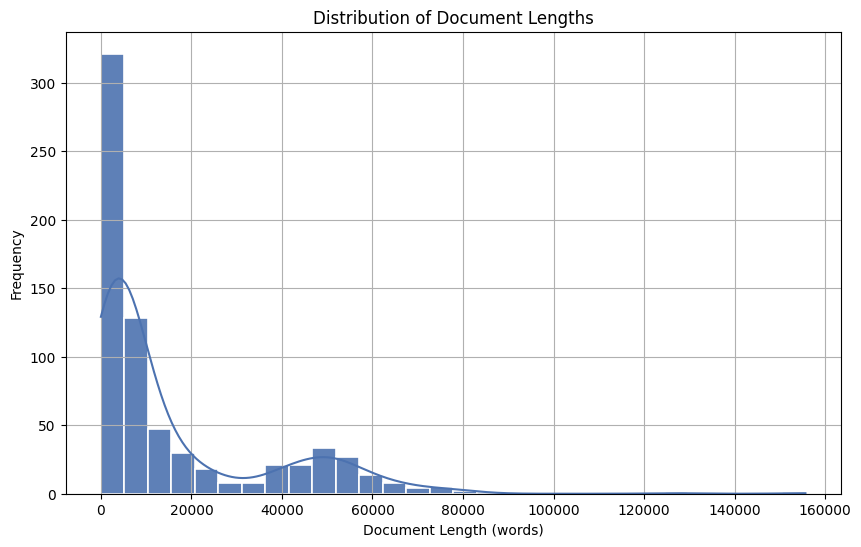

In [17]:
# Calculate the average, maximum and minimum document length.
import numpy as np

document_len = [len(doc.text.split()) for doc in document]
average_length = np.mean(document_len)
max_length = np.max(document_len)
min_length = np.min(document_len)

print(f"Average Document Length: {average_length:.2f} words")
print(f"Maximum Document Length: {max_length} words")
print(f"Minimum Document Length: {min_length} words")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(document_len, kde=True, bins= 30, color = '#4C72B0', edgecolor= 'white', linewidth=1.2, alpha=0.9)
plt.title("Distribution of Document Lengths")
plt.xlabel("Document Length (words)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



#### **1.3.2** <font color=red> [4 marks] </font>
Analyse the frequency of occurrence of words and find the most and least occurring words.

Find the 20 most common and least common words in the text. Ignore stop words such as articles and prepositions.

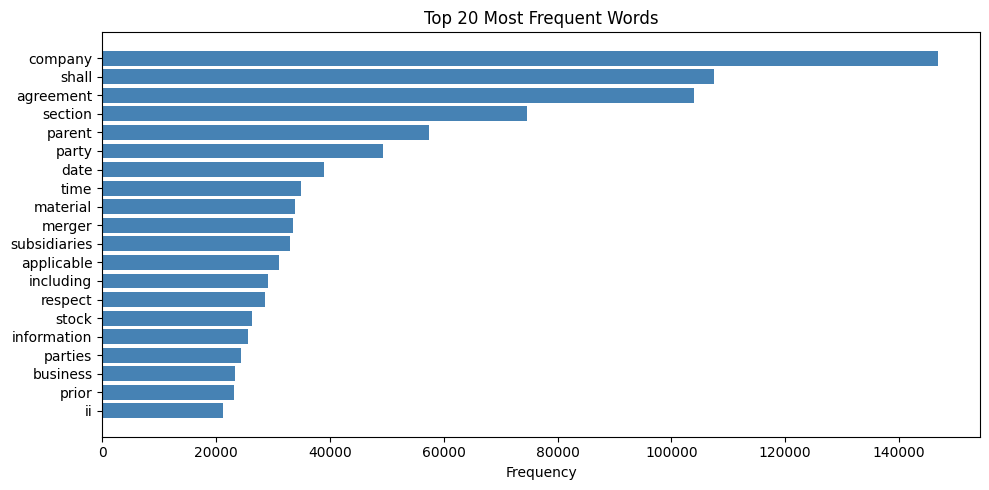

/tmp/ipython-input-3026507274.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in bottom_20], y=[x[0] for x in bottom_20], palette='viridis')


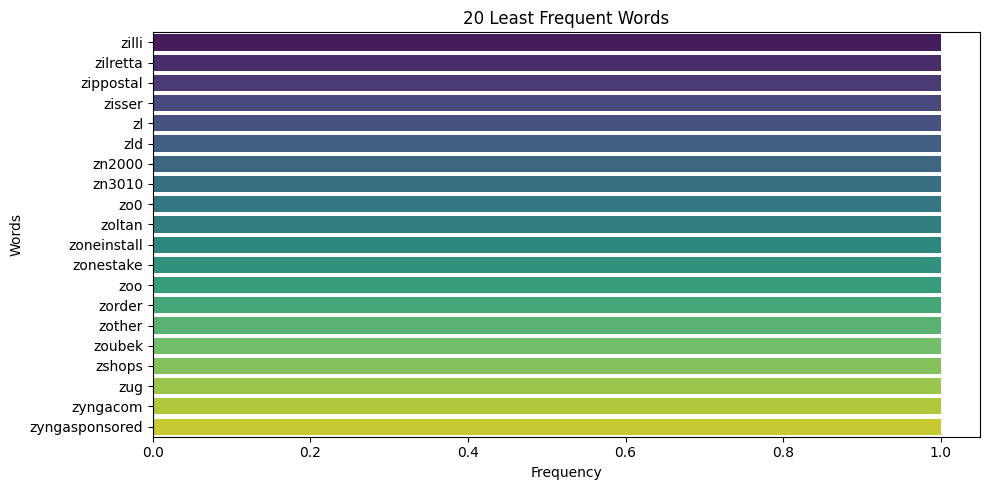

In [18]:
# Find frequency of occurence of words
from sklearn.feature_extraction.text import CountVectorizer

texts = [doc.text.lower() for doc in document]  # Convert all to lowercase
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
word_counts = X.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()

word_freq = list(zip(vocab, word_counts))
word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)
top_20 = word_freq_sorted[:20]
bottom_20 = word_freq_sorted[-20:]

#top 20 words
plt.figure(figsize=(10, 5))
plt.barh([w[0] for w in reversed(top_20)], [w[1] for w in reversed(top_20)], color='#4682B4')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 5))
sns.barplot(x=[x[1] for x in bottom_20], y=[x[0] for x in bottom_20], palette='viridis')
plt.title("20 Least Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()


#### **1.3.3** <font color=red> [4 marks] </font>
Analyse the similarity of different documents to each other based on TF-IDF vectors.

Transform some documents to TF-IDF vectors and calculate their similarity matrix using a suitable distance function. If contracts contain duplicate or highly similar clauses, similarity calculation can help detect them.

Identify for the first 10 documents and then for 10 random documents. What do you observe?

In [19]:
# Transform the page contents of documents

# Compute similarity scores



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

# Convert documents to lowercase
texts = [doc.text.lower() for doc in document]

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix_10 = tfidf.fit_transform(texts[:10])
sim_matrix_10 = cosine_similarity(tfidf_matrix_10)

print(sim_matrix_10)




[[1.         0.25897601 0.60964344 0.48708944 0.56405921 0.5129109
  0.70947156 0.48755412 0.54647365 0.2685881 ]
 [0.25897601 1.         0.26484637 0.19064981 0.22732786 0.21351787
  0.25025795 0.2736289  0.23974299 0.13067435]
 [0.60964344 0.26484637 1.         0.66703547 0.74166082 0.71640286
  0.76596362 0.47253338 0.7082059  0.20812309]
 [0.48708944 0.19064981 0.66703547 1.         0.6404654  0.5828562
  0.61371615 0.32362433 0.59449389 0.1744073 ]
 [0.56405921 0.22732786 0.74166082 0.6404654  1.         0.62719961
  0.64457068 0.40959081 0.70646978 0.17844489]
 [0.5129109  0.21351787 0.71640286 0.5828562  0.62719961 1.
  0.62861902 0.35605898 0.61949726 0.19189313]
 [0.70947156 0.25025795 0.76596362 0.61371615 0.64457068 0.62861902
  1.         0.40759689 0.61773669 0.17829489]
 [0.48755412 0.2736289  0.47253338 0.32362433 0.40959081 0.35605898
  0.40759689 1.         0.44538412 0.26665339]
 [0.54647365 0.23974299 0.7082059  0.59449389 0.70646978 0.61949726
  0.61773669 0.4453841

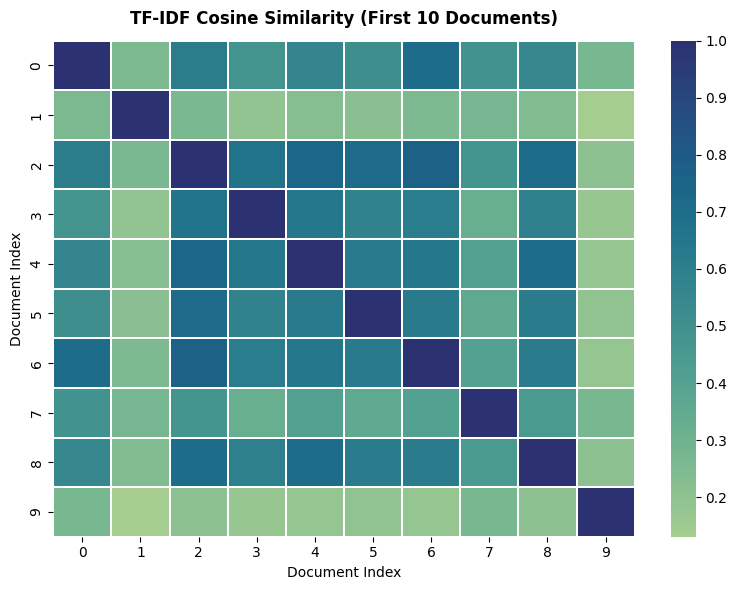

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix_10, annot=False, cmap='crest', linewidth=0.3)

plt.title("TF-IDF Cosine Similarity (First 10 Documents)", weight='bold', pad=12)
plt.xlabel("Document Index")
plt.ylabel("Document Index")
plt.tight_layout()
plt.show()

In [21]:
# create a list of 10 random integers

random_indices = random.sample(range(len(texts)), 10)
tfidf_matrix_rand = tfidf.fit_transform([texts[i] for i in random_indices])
sim_matrix_rand = cosine_similarity(tfidf_matrix_rand)

print(sim_matrix_rand)

[[1.         0.14035583 0.1881444  0.16177746 0.16693092 0.16209787
  0.11543233 0.11015143 0.14636939 0.11766174]
 [0.14035583 1.         0.21674282 0.13671528 0.34300716 0.19486186
  0.1400787  0.14670063 0.17592772 0.14235914]
 [0.1881444  0.21674282 1.         0.26043134 0.28230408 0.39650073
  0.19172813 0.31785611 0.37198785 0.30150046]
 [0.16177746 0.13671528 0.26043134 1.         0.17656792 0.1722117
  0.12857813 0.12020053 0.16056512 0.12977173]
 [0.16693092 0.34300716 0.28230408 0.17656792 1.         0.24820846
  0.21041899 0.19117401 0.23436525 0.18801361]
 [0.16209787 0.19486186 0.39650073 0.1722117  0.24820846 1.
  0.16148586 0.49205702 0.53192034 0.42593911]
 [0.11543233 0.1400787  0.19172813 0.12857813 0.21041899 0.16148586
  1.         0.10382289 0.14806153 0.11943654]
 [0.11015143 0.14670063 0.31785611 0.12020053 0.19117401 0.49205702
  0.10382289 1.         0.93586917 0.87611889]
 [0.14636939 0.17592772 0.37198785 0.16056512 0.23436525 0.53192034
  0.14806153 0.935869

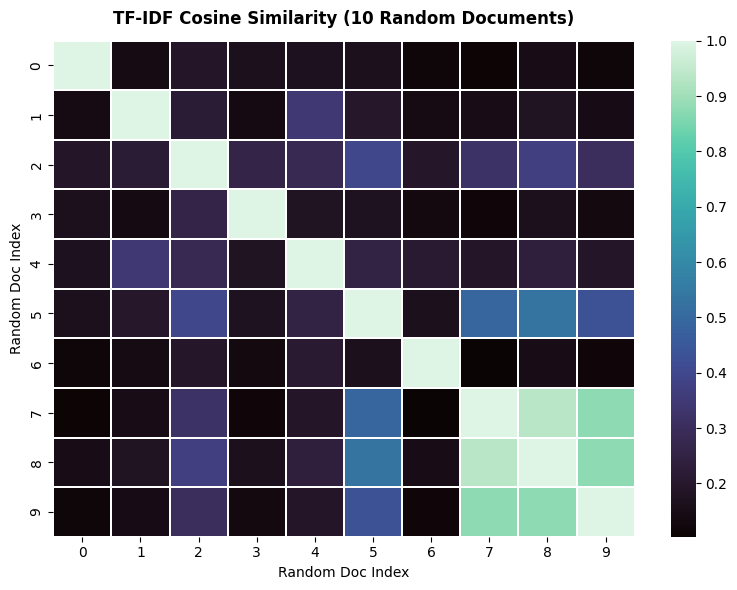

In [22]:
# Compute similarity scores for 10 random documents

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix_rand, annot=False, cmap='mako', linewidth=0.3)
plt.title("TF-IDF Cosine Similarity (10 Random Documents)", weight='bold', pad=12)
plt.xlabel("Random Doc Index")
plt.ylabel("Random Doc Index")
plt.tight_layout()
plt.show()

### **1.4 Document Creation and Chunking** <font color=red> [5 marks] </font><br>

#### **1.4.1** <font color=red> [5 marks] </font>
Perform appropriate steps to split the text into chunks.

In [23]:
# Process files and generate chunks

from llama_index.core.node_parser import SentenceSplitter

splitter = SentenceSplitter(chunk_size=512, chunk_overlap=50)
nodes = splitter.get_nodes_from_documents(document)

In [24]:
print(f"Total clean documents loaded are: {len(document)}")
print(f"Total chunks created after splitting are: {len(nodes)}")



Total clean documents loaded are: 698
Total chunks created after splitting are: 34390


In [25]:

print("Sample Chunk Preview:")
print(nodes[0].get_content()[:500])

Sample Chunk Preview:
mutual nondisclosure agreement between and subject matter effective date of agreement period 2017 for exchange of information 2017 to period of confidentiality this agreement is made as of the effective date of agreement noted above by and between the above parties background i the parties desire to have discussions of or relating to the subject matter for the purposes of evaluating a possible business relationship between them purpose the parties may extend the subject matter or add additional 


## **2. Vector Database and RAG Chain Creation** <font color=red> [15 marks] </font><br>

### **2.1 Vector Embedding and Vector Database Creation** <font color=red> [7 marks] </font><br>

#### **2.1.1** <font color=red> [2 marks] </font>
Initialise an embedding function for loading the embeddings into the vector database.

Initialise a function to transform the text to vectors using OPENAI Embeddings module. You can also use this function to transform during vector DB creation itself.

In [26]:
import os
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings

In [ ]:
!pip install -q sentence-transformers llama-index llama-index-embeddings-huggingface


In [ ]:
# Fetch your OPENAI API Key as an environment variable


#from google.colab import userdata
#openai.api_key = userdata.get("OpenAI_API_Key")

In [27]:
# Initialise an embedding function

embedding_function = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/tmp/ipython-input-3081733227.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public mo

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### **2.1.2** <font color=red> [5 marks] </font>
Load the embeddings to a vector database.

Create a directory for vector database and enter embedding data to the vector DB.

In [32]:
from tqdm import tqdm


In [31]:
# Add Chunks to vector DB


# --- Build a safe accessor for node text across LlamaIndex versions ---
def node_text(n):
    # Prefer .text; fall back to .get_content() if needed
    return getattr(n, "text", None) or n.get_content()

def node_id(n, i):
    # Prefer stable id if present; else fallback to index
    return getattr(n, "id_", None) or getattr(n, "node_id", None) or f"node-{i}"

def node_metadata(n):
    md = dict(getattr(n, "metadata", {}) or {})
    # normalize filename key if available
    md["filename"] = (
        md.get("filename")
        or md.get("file_name")
        or md.get("source")
        or getattr(n, "ref_doc_id", "")
        or ""
    )
    return md

# --- Initialize embedding model ---
em_func = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# --- Extract texts, metadatas, and ids from nodes safely ---
texts, metadatas, ids = [], [], []
for i, n in enumerate(nodes):
    t = node_text(n)
    if t and t.strip():
        texts.append(t)
        md = node_metadata(n)
        md["chunk_id"] = i
        metadatas.append(md)
        ids.append(node_id(n, i))

# --- Initialize (or open) Chroma DB ---
directory_p = "ch_db"
vectorstore = Chroma(
    collection_name="my_corpus",
    embedding_function=em_func,
    persist_directory=directory_p
)

# --- Batch insert to avoid memory spikes ---
BATCH_SIZE = 1000
for start in tqdm(range(0, len(texts), BATCH_SIZE)):
    end = start + BATCH_SIZE
    vectorstore.add_texts(
        texts=texts[start:end],
        metadatas=metadatas[start:end],
        ids=ids[start:end]  # helpful for dedup / re-runs
    )

# --- Persist to disk ---
vectorstore.persist()
print("Vectorstore with batched embeddings is now created!")


/tmp/ipython-input-2862017051.py:38: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(
100%|██████████| 35/35 [1:28:37<00:00, 151.92s/it]

Vectorstore with batched embeddings is now created!



/tmp/ipython-input-2862017051.py:55: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


### **2.2 Create RAG Chain** <font color=red> [8 marks] </font><br>

#### **2.2.1** <font color=red> [5 marks] </font>
Create a RAG chain.

In [72]:
# Create a RAG chain

!# --- Minimal RAG chain for your Chroma vectorstore ---

from transformers import pipeline
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

# 1) Retriever from your vectorstore
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

# 2) Lightweight HF pipeline (T5) — 512 max input tokens
hf = pipeline("text2text-generation", model="google/flan-t5-base", max_length=512)

# 3) Prompt
legal_prompt = PromptTemplate(
    input_variables=["context", "question"],
    template=(
        "You are an NDA legal assistant. ONLY answer using the NDA text provided.\n\n"
        "Determine if the NDA says the Receiving Party gains NO rights to the Confidential Information.\n\n"
        "Rules:\n- Explicit 'no rights' = YES\n- Any rights granted = NO\n- Not mentioned / unclear = NOT MENTIONED\n\n"
        "Return format:\n"
        "Answer: YES / NO / NOT MENTIONED\n"
        "Evidence: \"exact quote\"\n"
        "Conclusion: one sentence\n\n"
        "NDA TEXT:\n{context}\n\nQUESTION:\n{question}"
    )
)

# 4) Chain (keeps context short; enforces truncation at generation)
rag_chain = (
    RunnableParallel({
        "context": (
            (lambda x: x["question"])
            | retriever
            | (lambda docs: "\n\n".join(d.page_content[:300] for d in docs[:3]))  # <= trim context
        ),
        "question": RunnablePassthrough()
    })
    | legal_prompt
    | (lambda s: hf(s, return_full_text=False, truncation=True, max_new_tokens=160)[0]["generated_text"].strip())
)

# 5) Ask helpers
def ask(question: str) -> str:
    return rag_chain.invoke({"question": question})

def ask_with_sources(question: str):
    docs = retriever.invoke(question)
    ans = rag_chain.invoke({"question": question})
    srcs = [
        getattr(d, "metadata", {}).get("filename", getattr(d, "metadata", {}).get("source", "unknown"))
        for d in docs[:3]
    ]
    return {"answer": ans, "sources": srcs}



Device set to use cpu


#### **2.2.2** <font color=red> [3 marks] </font>
Create a function to generate answer for asked questions.

Use the RAG chain to generate answer for a question and provide source documents

In [75]:
# Create a function for question answering

# Create a function for question answering

def answer_question(query: str, k: int = 3, max_chars: int = 300):
    # 1) Retrieve relevant chunks
    docs = retriever.invoke(query)

    # 2) Build a compact context
    context = "\n\n".join(d.page_content[:max_chars] for d in docs[:k])

    # 3) Format the prompt (use your existing PromptTemplate if available)
    if 'legal_prompt' in globals():
        prompt_text = legal_prompt.format(context=context, question=query)
    else:
        prompt_text = f"""You are an NDA legal assistant. ONLY answer using the NDA text provided.

Rules:
- Explicit "no rights" = YES
- Any rights granted = NO
- Not mentioned / unclear = NOT MENTIONED

Return:
Answer: YES / NO / NOT MENTIONED
Evidence: "exact quote"
Conclusion: one sentence

NDA TEXT:
{context}

QUESTION:
{query}"""

    # 4) Generate answer (token-safe)
    gen = hf(prompt_text, truncation=True, max_new_tokens=160)[0]["generated_text"].strip()


    # 5) Collect sources
    sources = [
        getattr(d, "metadata", {}).get("filename", getattr(d, "metadata", {}).get("source", "unknown"))
        for d in docs[:k]
    ]

    return {
        "question": query,
        "answer": gen,
        "sources": sources
    }


In [ ]:
/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/rag_legal

In [76]:
# Example question
# question ="Consider the Non-Disclosure Agreement between CopAcc and ToP Mentors; Does the document indicate that the Agreement does not grant the Receiving Party any rights to the Confidential Information?"

# Example question
question = (
    "Consider the Non-Disclosure Agreement between CopAcc and ToP Mentors; "
    "Does the document indicate that the Agreement does not grant the Receiving "
    "Party any rights to the Confidential Information?"
)

# Run the question-answering function
response = answer_question(question)

# Display results
print("🧾 Question:")
print(response["question"])

print("\n✅ Answer:")
print(response["answer"])

print("\n Sources used:")
for src in response["sources"]:
    print("-", src)




🧾 Question:
Consider the Non-Disclosure Agreement between CopAcc and ToP Mentors; Does the document indicate that the Agreement does not grant the Receiving Party any rights to the Confidential Information?

✅ Answer:
YES

 Sources used:
- nda-employee-template.txt
- FIBROGENINC_10_01_2014-EX-10.11-COLLABORATION AGREEMENT.txt
- REGANHOLDINGCORP_03_31_2008-EX-10-LICENSE AND HOSTING AGREEMENT.txt


## **3. RAG Evaluation** <font color=red> [10 marks] </font><br>

### **3.1 Evaluation and Inference** <font color=red> [10 marks] </font><br>

#### **3.1.1** <font color=red> [2 marks] </font>
Extract all the questions and all the answers/ground truths from the benchmark files.

Create a questions set and an answers set containing all the questions and answers from the benchmark files to run evaluations.

In [77]:
# Create a question set by taking all the questions from the benchmark data
# Also create a ground truth/answer set

import json
from pathlib import Path

# ✅ Correct benchmark file path
benchmark_file = Path("/content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/rag_legal/benchmarks/privacy_qa.json")

questions, ground_truths = [], []

# --- Load benchmark JSON ---
with open(benchmark_file, "r", encoding="utf-8") as f:
    data = json.load(f)

# --- Extract questions and answers ---
for item in data.get("tests", []):
    q = (item.get("query") or "").strip()

    # extract answer from the first snippet entry if available
    snippets = item.get("snippets", [])
    if snippets and isinstance(snippets[0], dict) and "answer" in snippets[0]:
        a = (snippets[0]["answer"] or "").strip()
    else:
        a = ""

    if q and a:
        questions.append(q)
        ground_truths.append(a)

# --- Summary ---
print("✅ Benchmark data loaded from:", benchmark_file)
print("Total Questions Loaded:", len(questions))
print("Total Ground Truth Answers Loaded:", len(ground_truths))

# --- Preview ---
if questions:
    print("\n Sample Question:", questions[0])
    print("Sample Ground Truth:", ground_truths[0])
else:
    print("\n No QA pairs found in the file!")




✅ Benchmark data loaded from: /content/drive/MyDrive/RAG/Starter and Dataset RAG Legal/rag_legal/rag_legal/benchmarks/privacy_qa.json
Total Questions Loaded: 194
Total Ground Truth Answers Loaded: 194

 Sample Question: Consider "Fiverr"'s privacy policy; who can see which tasks i hire workers for?
Sample Ground Truth: In addition, we collect information while you access, browse, view or otherwise use the Site.
In other words, when you access the Site we are aware of your usage of the Site, and may gather, collect and record the information relating to such usage, including geo-location information, IP address, device and connection information, browser information and web-log information, and all communications recorded by Users through the Site.


#### **3.1.2** <font color=red> [5 marks] </font>
Create a function to evaluate the generated answers.

Evaluate the responses on *Rouge*, *Ragas* and *Bleu* scores.

In [82]:
# Function to evaluate the RAG pipeline


# ===============================================
# Evaluate generated answers on ROUGE, BLEU, RAGAS
# ===============================================
from typing import List, Dict, Any
from datasets import Dataset
from ragas import evaluate as ragas_evaluate

# RAGAS metrics (handle version differences)
try:
    from ragas.metrics import faithfulness, context_precision, context_relevancy
    HAS_CONTEXT_RELEVANCY = True
except Exception:
    from ragas.metrics import faithfulness, context_precision, answer_relevancy as context_relevancy
    HAS_CONTEXT_RELEVANCY = False
try:
    from ragas.metrics import context_recall
    HAS_CONTEXT_RECALL = True
except Exception:
    HAS_CONTEXT_RECALL = False


def _compute_rouge(preds: List[str], refs: List[str]) -> Dict[str, float]:
    """Compute ROUGE using rouge-score (pip install rouge-score)."""
    try:
        from rouge_score import rouge_scorer
    except Exception as e:
        raise ImportError("ROUGE requires 'rouge-score'. Install with: pip install rouge-score") from e
    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL", "rougeLsum"], use_stemmer=True)
    sums = {"rouge1": 0.0, "rouge2": 0.0, "rougeL": 0.0, "rougeLsum": 0.0}
    n = max(1, len(preds))
    for p, r in zip(preds, refs):
        s = scorer.score(r, p)  # (reference, prediction)
        for k in sums:
            sums[k] += s[k].fmeasure
    return {k: v / n for k, v in sums.items()}


def _compute_bleu(preds: List[str], refs: List[str]) -> Dict[str, Any]:
    """Compute BLEU via sacrebleu (preferred) or nltk fallback."""
    try:
        import sacrebleu
        result = sacrebleu.corpus_bleu(preds, [refs])
        return {
            "score": result.score,
            "precisions": result.precisions,
            "bp": result.bp,
            "sys_len": result.sys_len,
            "ref_len": result.ref_len,
        }
    except Exception:
        try:
            from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
            refs_tok = [[r.split()] for r in refs]
            preds_tok = [p.split() for p in preds]
            smoothie = SmoothingFunction().method4
            score = corpus_bleu(refs_tok, preds_tok, smoothing_function=smoothie) * 100.0
            return {"score": score, "precisions": None, "bp": None, "sys_len": None, "ref_len": None}
        except Exception as e:
            raise ImportError(
                "BLEU requires 'sacrebleu' or 'nltk'. Install with: pip install sacrebleu  (or) pip install nltk"
            ) from e


def _normalize_contexts(contexts, topk=3, truncate_chars=220):
    """RAGAS expects List[List[str]]. Accept strings or LangChain docs; keep short."""
    norm = []
    for item in contexts:
        cur = []
        for d in item[:topk]:
            if hasattr(d, "page_content"):
                cur.append(str(d.page_content)[:truncate_chars])
            else:
                cur.append(str(d)[:truncate_chars])
        norm.append(cur)
    return norm


def evaluate_generated_answers(
    answer_fn,                      # your function: answer_question(query) -> {"answer": str, "sources": ...}
    retriever,                      # your retriever (vectorstore.as_retriever(...))
    questions: List[str],
    ground_truths: List[str],
    llm=None,                       # optional: RAGAS LLM wrapper (e.g., llm_wrapper). Prefer long-context model.
    embeddings=None,                # optional: RAGAS embeddings wrapper (e.g., ragas_emb)
    limit: int = 100,               # evaluate first N
    topk: int = 3,
    truncate_chars: int = 220,
) -> Dict[str, Any]:
    """
    Runs the QA pipeline for the first `limit` questions and returns:
      - 'rouge': {'rouge1','rouge2','rougeL','rougeLsum'}
      - 'bleu':  BLEU result dict
      - 'ragas': ragas results object or None (if metrics not provided)
      - also returns model_answers and contexts actually used
    """
    # Slice questions/answers
    qs = questions[:limit]
    gts = ground_truths[:limit]

    # Generate answers + collect contexts
    model_answers, contexts = [], []
    for q in qs:
        out = answer_fn(q)
        model_answers.append(out.get("answer", "").strip())
        docs = retriever.invoke(q)
        contexts.append(docs[:topk])  # store docs; we'll normalize for ragas later

    # Compute ROUGE & BLEU
    rouge_res = _compute_rouge(model_answers, gts)
    bleu_res = _compute_bleu(model_answers, gts)

    # RAGAS metrics selection
    ragas_metrics = []
    if embeddings is not None and HAS_CONTEXT_RECALL:
        ragas_metrics.append(context_recall)
    if embeddings is not None:
        ragas_metrics.append(context_precision)
    if llm is not None:
        ragas_metrics.append(faithfulness)
        ragas_metrics.append(context_relevancy)

    ragas_res = None
    if ragas_metrics:
        ds = Dataset.from_dict({
            "question": qs,
            "answer": model_answers,
            "contexts": _normalize_contexts(contexts, topk=topk, truncate_chars=truncate_chars),
            "ground_truth": gts,
        })
        ragas_res = ragas_evaluate(dataset=ds, metrics=ragas_metrics, llm=llm, embeddings=embeddings)

    return {
        "rouge": rouge_res,
        "bleu": bleu_res,
        "ragas": ragas_res,
        "model_answers": model_answers,
        "contexts": contexts,
    }


#### **3.1.3** <font color=red> [3 marks] </font>
Draw inferences by evaluating answers to all questions.

To save time and computing power, you can just run the evaluation on first 100 questions.

In [ ]:
# Evaluate the RAG pipeline
results = evaluate_generated_answers(
    answer_fn=answer_question,              # you already defined this
    retriever=retriever,                    # from your vectorstore
    questions=questions,
    ground_truths=ground_truths,

    limit=100,                 # first 100 to save time
    topk=3,
    truncate_chars=220,
)

print("\n ROUGE:")
for k, v in results["rouge"].items():
    print(f"  {k}: {v:.4f}")

print("\n BLEU:")
print(f"  score: {results['bleu']['score']:.2f}")

print("\n RAGAS:")
print(results["ragas"])


## **4. Conclusion** <font color=red> [5 marks] </font><br>

### **4.1 Conclusions and insights** <font color=red> [5 marks] </font><br>

#### **4.1.1** <font color=red> [5 marks] </font>
Conclude with the results here. Include the insights gained about the data, model pipeline, the RAG process and the results obtained.